In [1]:
import csv
import time
import os.path
import datetime
import numpy as np
np.seterr(divide='ignore', invalid='ignore')
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import csv
import itertools
from scipy.stats import gaussian_kde
import math
import inspect
import graphviz
import pickle5 as pickle
import plotly.graph_objects as go
import pprint
import random

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.model_selection import RandomizedSearchCV

from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.model_selection import train_test_split, GridSearchCV
from scipy.cluster.hierarchy import dendrogram
from sklearn.ensemble import BaggingClassifier
from tslearn.clustering import TimeSeriesKMeans
from tslearn.datasets import CachedDatasets
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, TimeSeriesResampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.compose import make_column_transformer
from sklearn.feature_selection import RFE
from sklearn.externals import joblib
from sklearn.isotonic import IsotonicRegression
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve, f1_score
from sklearn.ensemble.forest import _generate_unsampled_indices
from sklearn.ensemble.forest import _get_n_samples_bootstrap
from sklearn.ensemble.forest import _generate_sample_indices
from sklearn import tree

C:\Users\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.cluster.k_means_ module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.cluster. Anything that cannot be imported from sklearn.cluster is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\Anaconda\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will

In [2]:
DBorig = pickle.load(open('DBup_2019.pickle', "rb"))
#DB=DBorig.sample(n=10000)
DB=DBorig[DBorig.Tech!='UVAM']
DB['Result'].value_counts() # check su % accettati su totale

#DB = pickle.load(open('DBup_2019.pickle', "rb"))

0.0    748123
1.0     27747
Name: Result, dtype: int64

In [3]:
DB

,hour,SC_PC1,SC_PC2,IN_PC1,IN_PC2,CT_PC1,CT_PC2,PurchMGP,SellMGP,MargTech,GNprice,SolarAngle,DeclAngle,WorkDay,Prov,Tech,PV,Price,Target,Result
idx,,,,,,,,,,,,,,,,,,,,
01/01/20191UP_ACTV_1,1,3.35337,0.0506634,-3.76401,0.464396,-1.04228,2.70496,11460.3,9179.69,Ccgt,23.11,-178.226,-23.0116,holiday,Vercelli,Thermoelectric,0,130,0,0
01/01/20191UP_ALTOADDA_1,1,3.35337,0.0506634,-3.76401,0.464396,-1.04228,2.70496,11460.3,9179.69,Ccgt,23.11,-178.226,-23.0116,holiday,Milano,Hydro Run-of-river and poundage,0,105.5,0,0
01/01/20191UP_ARSIE_1,1,3.35337,0.0506634,-3.76401,0.464396,-1.04228,2.70496,11460.3,9179.69,Ccgt,23.11,-178.226,-23.0116,holiday,Belluno,Hydro Run-of-river and poundage,0,150,0,0
01/01/20191UP_AZOTATI_5,1,3.35337,0.0506634,-3.76401,0.464396,-1.04228,2.70496,11460.3,9179.69,Ccgt,23.11,-178.226,-23.0116,holiday,Venezia,Fossil Gas,0,118,0,0
01/01/20191UP_BARGI_CEN_1,1,3.35337,0.0506634,-3.76401,0.464396,-1.04228,2.70496,11460.3,9179.69,Ccgt,23.11,-178.226,-23.0116,holiday,Bologna,Hydro Pumped Storage,0,350,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31/12/201924UP_VALCAMONICA_1,24,0.0991118,0.710441,-3.12927,0.576563,-1.13496,2.58057,12643.6,11719.2,Ccgt,13.773,166.887,-23.0859,weekday,Varese,Hydro Run-of-river and poundage,0.914286,95.75,0,0
31/12/201924UP_VALPELLIN_1,24,0.0991118,0.710441,-3.12927,0.576563,-1.13496,2.58057,12643.6,11719.2,Ccgt,13.773,166.887,-23.0859,weekday,Aosta,Hydro Water Reservoir,0,70,0,0
31/12/201924UP_VAL_NOANA_1,24,0.0991118,0.710441,-3.12927,0.576563,-1.13496,2.58057,12643.6,11719.2,Ccgt,13.773,166.887,-23.0859,weekday,Trento,Hydro Water Reservoir,0,70,0,0


In [4]:
retrain_model = False;
#DB = pd.read_pickle('DB.pickle')

### 1) Building the classification model (encoding, scaling and training + hyperparameters optimisation)
### 2) Evaluate the model (accuracy, oob score, recall, precision, ROC AUC, confusion matrix)
### 3) Feature importance --> capire unità di misura dell'importanza


### 1) Classification Model ###

# features list
#["hour", "SC_PC1", "SC_PC2", "IN_PC2", "IN_PC2","CT_PC1","CT_PC2","PurchMGP","SellMGP","MargTech","GNprice", "SolarAngle","DeclAngle","WorkDay","Prov","Tech","PV","Price"]

## Handling features: categorical (to be encoded) and numerical (to be standardized)
#categorical_features = ['MargTech', 'hour', 'WorkDay', 'Prov','Tech']
#numeric_features = ["SC_PC1", "SC_PC2", "IN_PC2", "IN_PC2","CT_PC1","CT_PC2","PurchMGP","SellMGP","GNprice", "SolarAngle","DeclAngle","PV","Price"] #"Target",
categorical_features = ['MargTech', 'hour', 'WorkDay', 'Prov','Tech']
#numeric_features = ["SC_PC1", "SC_PC2", "IN_PC2", "IN_PC2","CT_PC1","CT_PC2","PurchMGP","SellMGP","GNprice", "SolarAngle","DeclAngle","PV","Price"] #"Target"
numeric_features = ["PurchMGP","SellMGP","GNprice", "SolarAngle","DeclAngle","PV","Price"] #"Target"

# dropping the 'Result' feature which refers to the classification model
y = DB['Result'];
y=y.astype('int')
X = DB.drop('Result', axis=1)

## Classifier train and test datasets
print("Splitting...")
X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.333, shuffle=False, random_state=42) # random state used to control the model seed

# dropping the 'Target' feature which refers to the regression model
X_test_with_target = X_test;
X_test = X_test.drop('Target', axis=1)
X_train = X_train.drop('Target', axis=1)

# -------- FEATURE TRANFORMATION ------- #
# Encoding + Standardisation
feature_trans = make_column_transformer(
        (OneHotEncoder(handle_unknown='ignore'),categorical_features), # se tolgo handle unknown errore perchè alcune categorical non le ha nel training ma le ha nel test --> forse si risolve se DB grande
        (StandardScaler(), numeric_features), 
         remainder="passthrough") # passing not-cited columns as untouched

Splitting...


In [ ]:
#------- HYPERPARAMETERS OPTIMIZATION -----#
# Optimal number of estimators (trees) based on accuracy and OOB error
idx=0

start=50
end=500
step=50

trees = [None] * round(end/step)
oob_result = [None] * round(end/step)
accuracy_result = [None] * round(end/step)

for n_est in range(start,end,step):
    trees[idx] = n_est
    
    rf_class = RandomForestClassifier(
                    n_estimators=n_est, criterion="gini", oob_score=True,
                    min_samples_leaf=1, max_features= "sqrt", bootstrap=True, 
                    random_state=42)
    
    modelCla_iter1 = make_pipeline(feature_trans, rf_class)
    
    modelCla_iter1.fit(X_train, y_train)
    oob_result[idx] = rf_class.oob_score_
    
    y_pred_iter1 = modelCla_iter1.predict(X_test)
    accuracy_result[idx] = accuracy_score(y_test, y_pred_iter1)
    
    idx+=1
    print(idx)

# Plot graph
fig = go.Figure()
fig.add_trace(go.Scatter(x=trees,y=oob_result, name="OOB train error"))
fig.add_trace(go.Scatter(x=trees,y=accuracy_result, name="Accuracy of test"))
fig.update_layout(title="OOB error and test accuracy",xaxis_title="number of trees estimators",
                  font=dict(family="Times New Roman, monospace",size=14,color="RebeccaPurple"),
                  template="plotly_white")

fig.show()


In [5]:
# Optimal classification probability threshold based on OOB
idx=0

start=1
end=99
step=1

FNR = [None] * round(end/step)
FPR = [None] * round(end/step)
tot_err = [None] * round(end/step)
MattCorr = [None] * round(end/step)
thresh = [None] * round(end/step)

rf_class = RandomForestClassifier(
                n_estimators=500, criterion="gini", oob_score=True,
                min_samples_leaf=1, max_features= "sqrt", bootstrap=True, 
                random_state=42)

modelCla_iter2 = make_pipeline(feature_trans, rf_class)
modelCla_iter2.fit(X_train, y_train)

for prob_thre in range(start,end,step):
    thresh[idx] = prob_thre/100
    
    y_pred_iter2 = (modelCla_iter2.predict_proba(X_test)[:,1] >= prob_thre/100).astype(bool)

    cm = confusion_matrix(y_test, y_pred_iter2)
    tp = cm[1,1]
    tn = cm[0,0]
    fn = cm[1,0]
    fp = cm[0,1]
    
    FNR[idx] = fn/(fn+tp)
    FPR[idx] = fp/(fn+tn)
    tot_err[idx] = 1 - (tp+tn)/(tp+tn+fp+fn)
    MattCorr[idx] = (tp*tn-fp*fn)/np.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn)) # per valori di alfa alti può non esistere perchè FNR=1
    #print(np.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn)))
    #print(cm), print(fn), print(fp), print(tot_err)
    idx+=1
    
# Plot graph
# FPR, FNR and Total error varying the threshold
fig = go.Figure()
fig.add_trace(go.Scatter(x=thresh,y=FNR, name="False Negative rate"))
fig.add_trace(go.Scatter(x=thresh,y=FPR, name="False Positive rate"))
fig.add_trace(go.Scatter(x=thresh,y=tot_err, name="Total Error (1 - accuracy)"))
fig.update_layout(title="Prediction error variation with the classsification threshold level",
                  xaxis_title="Classification level",
                  font=dict(family="Times New Roman, monospace",size=14,color="RebeccaPurple"),
                  template="plotly_white")
fig.show()

# Matthews Correlation Coefficient varying the threshold
fig = go.Figure()
fig.add_trace(go.Scatter(x=thresh,y=MattCorr))
fig.update_layout(title="Matthews Correlation Coefficient - varies from -1 (fully bad predictor) tot +1 (fully good predictor)",
                  xaxis_title="Classification level",
                  font=dict(family="Times New Roman, monospace",size=14,color="RebeccaPurple"),
                  template="plotly_white")
fig.show()


In [13]:
#----- DEFINITION OF THE CLASSIFICATION MODEL ------#
# if model is already saved in the directory, use the saved model, otherwise build a new one on inserted optimal hyperparams
n_est_opt = 200
thresh_opt = 0.22

if not(os.path.isfile('modelClassifier.joblib')):
    rf_class = RandomForestClassifier(
                    n_estimators=n_est_opt, criterion="gini", oob_score=True,
                    min_samples_leaf=1, max_features= "sqrt", bootstrap=True, 
                    random_state=42)
    
    modelCla = make_pipeline(feature_trans, rf_class)
    
    print("Training classifier...")
    modelCla.fit(X_train, y_train)
    #joblib.dump(modelCla, 'modelClassifier.joblib');# --> salvo il modello
else:
    rf_class = RandomForestClassifier(
                    n_estimators=n_est_opt, criterion="gini", oob_score=True,
                    min_samples_leaf=1, max_features= "sqrt", bootstrap=True, 
                    random_state=42)
    modelCla = make_pipeline(feature_trans, rf_class)
    
    modelCla = joblib.load('modelClassifier.joblib');

## Making the prediction with the classification model
print("Predicting with Classifier...")
y_pred = (modelCla.predict_proba(X_test)[:,1] >= thresh_opt).astype(bool)

C:\Users\Anaconda\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator OneHotEncoder from version 0.23.1 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\Anaconda\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator StandardScaler from version 0.23.1 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\Anaconda\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator ColumnTransformer from version 0.23.1 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\Anaconda\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 0.23.1 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
 

Predicting with Classifier...


The accuracy of the model is 97.0 %
Train ROC AUC Score: 0.99999984229721
Test ROC AUC  Score: 0.9420429082251414
Recall Baseline: 1.0 Test: 0.653 Train: 0.997
Precision Baseline: 0.036 Test: 0.568 Train: 1.0
Roc Baseline: 0.5 Test: 0.942 Train: 1.0


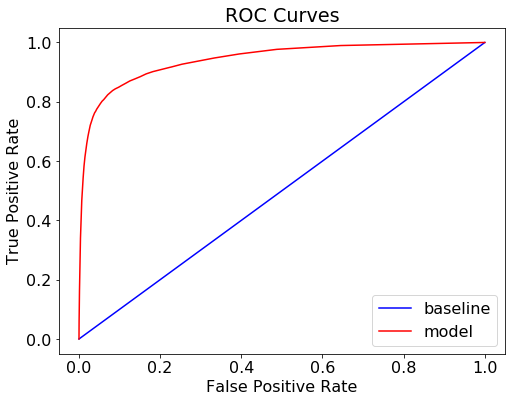

In [14]:
### 2) Evaluate the classification model ### 
## Evaluate the classification model: accuracy, recall, precision, ROC AUC, confusion matrix
# accuracy
print(f"The accuracy of the model is {round(accuracy_score(y_test,y_pred),3)*100} %") # formatted string literal or f-string
# OOB score
#print(f"The OOB error of the model is {round(1-rf_class.oob_score_,3)*100} %") # formatted string literal or f-string

# ROC AUC
# costruisco le distribuzioni di probabilità prevista per train e test datasets 
# (lo faccio sulla classe rappresentata dall'intero maggiore (1), che coincide con i positivi, avrò quindi le distribuzioni dei falsi e veri positivi)
train_probs = modelCla.predict_proba(X_train)[:,1] 
probs = modelCla.predict_proba(X_test)[:, 1]
# predizioni sul training
train_predictions = modelCla.predict(X_train)
print(f'Train ROC AUC Score: {roc_auc_score(y_train, train_probs)}')
print(f'Test ROC AUC  Score: {roc_auc_score(y_test, probs)}')

# plotting the ROC curve
def evaluate_model(y_pred, probs, train_predictions, train_probs):
    # base
    baseline = {}
    baseline['recall']=recall_score(y_test, [1 for _ in range(len(y_test))])
    baseline['precision'] = precision_score(y_test, [1 for _ in range(len(y_test))])
    baseline['roc'] = 0.5
    # test
    results = {}
    results['recall'] = recall_score(y_test, y_pred)
    results['precision'] = precision_score(y_test, y_pred)
    results['roc'] = roc_auc_score(y_test, probs)
    # train
    train_results = {}
    train_results['recall'] = recall_score(y_train, train_predictions)
    train_results['precision'] = precision_score(y_train, train_predictions)
    train_results['roc'] = roc_auc_score(y_train, train_probs)
    
    for metric in ['recall', 'precision', 'roc']:
        print(f'{metric.capitalize()} Baseline: {round(baseline[metric], 3)} Test: {round(results[metric], 3)} Train: {round(train_results[metric], 3)}')
    
    # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(y_test, [1 for _ in range(len(y_test))])
    model_fpr, model_tpr, _ = roc_curve(y_test, probs)
    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16
    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model') # probabilities of the test dataset
    plt.legend();
    plt.xlabel('False Positive Rate');
    plt.ylabel('True Positive Rate'); plt.title('ROC Curves');
    plt.show();

evaluate_model(y_pred,probs,train_predictions,train_probs)

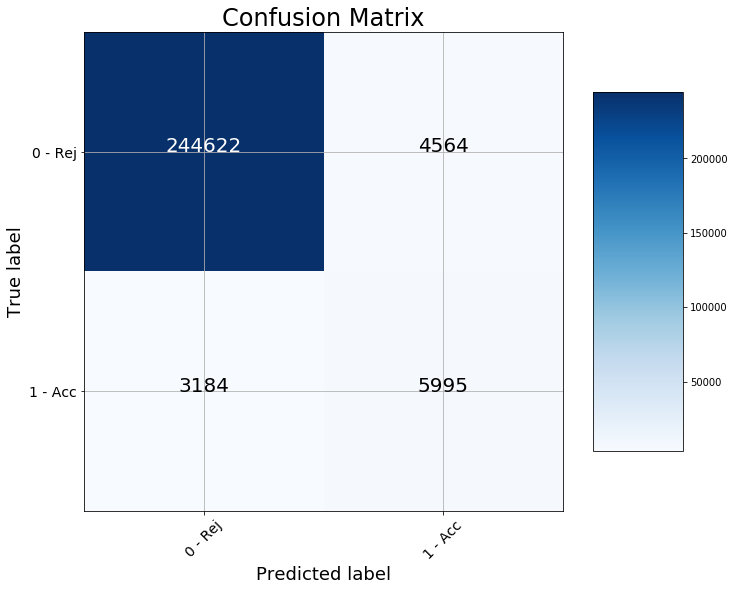

In [7]:
# CONSFUSION MATRIX
def plot_confusion_matrix(cm, classes, normalize = False, title='Confusion matrix', cmap=plt.cm.Blues): # can change color 
    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 14)
    plt.yticks(tick_marks, classes, size = 14)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    # Label the plot
    for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20, horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes = ['0 - Rej', '1 - Acc'], title = 'Confusion Matrix')

In [23]:
### 3) Feature Importance ###
#------------- Impurity based (depends on impurity used in model training) -------------####
#print(rf_class.feature_importances_)
print(f" There are {len(rf_class.feature_importances_)} features in total") # extra features wrt to train dataset columns are due to encoding
# (need to rebuild the original features to evaluate the importance)

#print(feature_trans.fit_transform(X_train)[0,:])
#print(X_train.iloc[0])
#print("# You see numerical variables are at the end")

def encode_and_bind(original_dataframe, features_to_encode):
    dummies = pd.get_dummies(original_dataframe[features_to_encode])
    res = pd.concat([dummies, original_dataframe], axis=1)
    res = res.drop(features_to_encode, axis=1)
    return(res)
X_train_encoded = encode_and_bind(X_train, categorical_features) # X_train with encoded categorical features

feature_importances = list(zip(X_train_encoded, rf_class.feature_importances_))
# riordino in ordine decrescente di importanza
feature_importances_ranked = sorted(feature_importances, key = lambda x: x[1], reverse = True)
[print('Feature: {:35} Importance: {}'.format(*pair)) for pair in feature_importances_ranked];
# plotting the freature importance (top 20)
feature_names_20 = [i[0] for i in feature_importances_ranked[:20]]
y_ticks = np.arange(0, len(feature_names_20))
x_axis = [i[1] for i in feature_importances_ranked[:20]]
plt.figure(figsize = (10, 14))
plt.barh(feature_names_20, x_axis)   #horizontal barplot
plt.title('Random Forest Feature Importance (Top 20)', fontdict= {'fontname':'Times New Roman','fontsize' : 20})
plt.xlabel('Features',fontdict= {'fontsize' : 16})
plt.show()

###------------ Permutation Feature Importance ------------####
# Hold-out test set
perm_feat_test = permutation_importance(modelCla, X_test, y_test, n_repeats=10,random_state=42, n_jobs=2)
sorted_idx = perm_feat_test.importances_mean.argsort()
fig = go.Figure()
for i in range(len(sorted_idx)):
    fig.add_trace(go.Box(x=perm_feat_test.importances[sorted_idx[i]].T,name=X_test.columns[sorted_idx[i]]))
#fig.add_trace(go.Box(x=X_test.columns[sorted_idx[1]]))
fig.update_layout(title="Permutation feature importance on hold-out test set",
                  font=dict(family="Times New Roman, monospace",size=14,color="RebeccaPurple"),
                  template="plotly_white")
fig.show()

# Training set
perm_feat_train = permutation_importance(modelCla, X_train, y_train, n_repeats=10,random_state=42, n_jobs=2)
sorted_idx = perm_feat_train.importances_mean.argsort()
fig = go.Figure()
for i in range(len(sorted_idx)):
    fig.add_trace(go.Box(x=perm_feat_train.importances[sorted_idx[i]].T,name=X_test.columns[sorted_idx[i]]))
#fig.add_trace(go.Box(x=X_test.columns[sorted_idx[1]]))
fig.update_layout(title="Permutation feature importance on train set",
                  font=dict(family="Times New Roman, monospace",size=14,color="RebeccaPurple"),
                  template="plotly_white")
fig.show()

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [9]:
### 1) Build the regression model on accepted samples ('Result'=1)
### 2) Evaluate the model: R2, MSE, MAE, ROOT MSE, oob
### 3) Extract the oob error for unsampled indexes for each baootstrapped tree
### 4) Extract as an array oob errorrs of a specific daytime range
### 5) Use it in a roulette wheel to associate uncertainty to the model prediction

### 1) Builging the regression model
#--> Per definire il dataset di partenza ho 3 soluzioni
choose_method=2

if choose_method==1:
    ## 1: Extract from the original DB only accepted offer (Result==1), discarding Result and Target in X_train, using Target as y_train
    X_train_regr, X_test_regr, y_train_regr, y_test_regr = train_test_split(
                    DB[DB['Result']>0].drop('Result', axis=1).drop('Target', axis=1), 
                    DB[DB['Result']>0]['Target'], 
                    test_size = 0.333, shuffle=False, random_state=42) # random state used to control the model seed
elif choose_method==2:
    ## 2: Predict with the classification model on the original dataset and take only samples predicted as accepted (some actual accepted samples will remain outside bcs they are predicted as rejected)
    X1=X.copy()
    X0=X.drop('Target',axis=1)
    pred_result = (modelCla.predict_proba(X0)[:,1] >= thresh_opt).astype(bool)
    X1['pred_result'] = pred_result
    X_train_regr, X_test_regr, y_train_regr, y_test_regr = train_test_split(
                    X1[X1['pred_result']==1].drop('Target', axis=1).drop('pred_result', axis=1), 
                    X1[X1['pred_result']>0]['Target'], 
                    test_size = 0.333, shuffle=False, random_state=42) # random state used to control the model seed
elif choose_method==3:
    ## 3: Take all the accepted and some rejected in percentage of the false positive of the classification model
    X1=X[X['Target']>0] # only accepted
    X2=X[X['Target']==0] # only rejected
    fp = cm[0,1] # false positives
    attach=X2.sample(n=fp)
    X1=X1.append(attach) # final starting DB
    X_train_regr, X_test_regr, y_train_regr, y_test_regr = train_test_split(
                    X1.drop('Target', axis=1), 
                    X1['Target'], 
                    test_size = 0.333, shuffle=False, random_state=42) # random state used to control the model seed


In [ ]:
#------- HYPERPARAMETERS OPTIMIZATION -----#
# Optimal number of estimators (trees) based on accuracy and OOB error
idx=0

start=100
end=1000
step=100

trees = [None] * round(end/step)
oob_result = [None] * round(end/step)
mse_result = [None] * round(end/step)
rmse_result = [None] * round(end/step)
mae_result = [None] * round(end/step)

for n_est in range(start,end,step):
    trees[idx] = n_est
    
    feature_trans_regr = make_column_transformer(
        (OneHotEncoder(handle_unknown='ignore'),categorical_features), # se tolgo handle unknown errore perchè alcune categorical non le ha nel training ma le ha nel test --> forse si risolve se DB grande
        (StandardScaler(), numeric_features), 
         remainder="passthrough") # passing not-cited columns as untouched
    
    rf_regr = RandomForestRegressor(
                    n_estimators=n_est, criterion="mse", oob_score=True,
                    min_samples_leaf=1, max_features= "sqrt", bootstrap=True, 
                    random_state=42)
    
    modelRegr_iter1 = make_pipeline(feature_trans_regr, rf_regr)
    
    modelRegr_iter1.fit(X_train_regr, y_train_regr)   
    y_pred_regr_iter1 = modelRegr_iter1.predict(X_test_regr)
    
    mse_result[idx] = metrics.mean_squared_error(y_test_regr, y_pred_regr_iter1)
    rmse_result[idx] = np.sqrt(metrics.mean_squared_error(y_test_regr, y_pred_regr_iter1))
    mae_result[idx] = metrics.mean_absolute_error(y_test_regr, y_pred_regr_iter1)
    
    idx+=1
    print(idx)

mean_pred=np.mean(DB[DB['Result']>0]['Target'])
print(f'Mean of predicted variable (Target): {mean_pred}')
# Plot graph
fig = go.Figure()
fig.add_trace(go.Scatter(x=trees,y=rmse_result, name="Root Mean Squared Error of test"))
fig.add_trace(go.Scatter(x=trees,y=mse_result, name="Mean Squared Error of test"))
fig.add_trace(go.Scatter(x=trees,y=mae_result, name="Mean Absolute Error of test"))
fig.update_layout(title="RMSE, MSE and MAE test",xaxis_title="number of trees estimators",
                  font=dict(family="Times New Roman, monospace",size=14,color="RebeccaPurple"),
                  template="plotly_white")

fig.show()

In [16]:
# ---------- REGRESSION ------------ #
## Building the regression model: random forest fitting on data
n_est_opt_regr = 200

feature_trans_regr = make_column_transformer(
        (OneHotEncoder(handle_unknown='ignore'),categorical_features), # se tolgo handle unknown errore perchè alcune categorical non le ha nel training ma le ha nel test --> forse si risolve se DB grande
        (StandardScaler(), numeric_features), 
         remainder="passthrough") # passing not-cited columns as unt

if not(os.path.isfile('modelRegressor.joblib')):
    rf_regr = RandomForestRegressor(
                    n_estimators=n_est_opt_regr, criterion="mse", oob_score=True,
                    min_samples_leaf=1, max_features= "sqrt", bootstrap=True, 
                    random_state=42)
    
    modelRegr = make_pipeline(feature_trans_regr, rf_regr)
    
    print("Training regressor...")
    modelRegr.fit(X_train_regr, y_train_regr)
    #joblib.dump(modelRegr, 'modelRegressor.joblib');
else:
    rf_regr = RandomForestRegressor(
                    n_estimators=n_est_opt_regr, criterion="mse", oob_score=True,
                    min_samples_leaf=1, max_features= "sqrt", bootstrap=True, 
                    random_state=42)
    modelRegr = make_pipeline(feature_trans_regr, rf_regr)
    
    modelRegr = joblib.load('modelRegressor.joblib');

#Regressor
print("Predicting with Regressor...")
y_pred_regr = modelRegr.predict(X_test_regr)

### 2) Evaluation of model performances
print(f'MSE: {metrics.mean_squared_error(list(y_test_regr), list(y_pred_regr))}')
print(f'R2: {metrics.r2_score(list(y_test_regr), list(y_pred_regr))}')
print(f'MAE: {metrics.mean_absolute_error(list(y_test_regr), list(y_pred_regr))}')
print(f'ROOT MSE: {np.sqrt(metrics.mean_squared_error(list(y_test_regr), list(y_pred_regr)))}')
mean_pred=np.mean(DB[DB['Result']>0]['Target'])
print(f'Mean of predicted variable (Target): {mean_pred}')


    

C:\Users\Anaconda\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator OneHotEncoder from version 0.23.1 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\Anaconda\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator StandardScaler from version 0.23.1 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\Anaconda\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator ColumnTransformer from version 0.23.1 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
C:\Users\Anaconda\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.23.1 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
  

Predicting with Regressor...
MSE: 0.0412325788084124
R2: -0.448024194512308
MAE: 0.1617372986025049
ROOT MSE: 0.20305806757775569
Mean of predicted variable (Target): 0.2963796296457042


In [22]:
### 3) Extract OOB error
# qui è solo per ispezionare le funzioni che ci interessano per estrarre oob da ogni albero ###
source_1 = inspect.getsource(rf_regr._set_oob_score)
#print(source_1)
source_2 = inspect.getsource(_get_n_samples_bootstrap)
#print(source_2)
source_2 = inspect.getsource(_get_n_samples_bootstrap)
#print(source_2)
source_3 = inspect.getsource(_generate_unsampled_indices)
#print(source_3)
source_4 = inspect.getsource(_generate_sample_indices)
#print(source_4)
###############################################################################################

# ------------ EXTRACT OOB ERROR OF EACH DECISION TREE ESTIMATOR --> CLASSIFICATION ----------- #
oob_col = range(0,rf_class.n_estimators) # numero di estimatori usati
X_oob_cla=pd.DataFrame(index=X_train_encoded.index,columns=oob_col) # righe: samples ; colonne: estimatori :--> dataframe degli oob di ogni estimatore
i=0
# Computing the oob error
n_samples = X_train_encoded.shape[0] # numero di samples nel train set
#n_samples_bootstrap = _get_n_samples_bootstrap(n_samples, rf_class.max_samples)
for dtree in rf_class.estimators_:
    ##Graphical representation of each tree
    #dot=tree.export_graphviz(dtree, out_file=None) 
    #graph = graphviz.Source(dot) 
    #graph
    
    # Extracting unsampled samples for each DT estimator
    unsampled_indices = _generate_unsampled_indices(dtree.random_state, n_samples, n_samples) # obtain out of bag samples for every tree.
    # Extracting the features used in each tree
    feat = dtree.tree_.feature[dtree.tree_.feature>0]
    # Computing the prediction for the out of bag samples
    X_trenc_arr=np.array(X_train_encoded.iloc[unsampled_indices, :],dtype='float32')
    #p_estimator = dtree.predict(X_trenc_arr, check_input=False)
    p_estimator = (dtree.predict_proba(X_trenc_arr, check_input=False)[:,1] >= thresh_opt).astype(bool)
    
    # Computing the out of bag error for each put of bag sample for the given tree
    X_oob_cla.iloc[unsampled_indices,i] = tuple(p_estimator) - y_train[unsampled_indices]
    i+=1

# ------------ EXTRACT OOB ERROR OF EACH DECISION TREE ESTIMATOR --> REGRESSION ----------- #
X_train_encoded_regr = encode_and_bind(X_train_regr, categorical_features) # X_train with encoded categorical features
oob_col_regr = range(0,len(rf_regr.estimators_)) # numero di estimatori usati
X_oob_regr=pd.DataFrame(index=X_train_encoded_regr.index,columns=oob_col_regr) # righe: samples ; colonne: estimatori :--> dataframe degli oob di ogni estimatore
i=0
# Computing the oob error
n_samples_regr = X_train_encoded_regr.shape[0] # numero di samples nel train set
#n_samples_bootstrap_regr = _get_n_samples_bootstrap(n_samples_regr, rf_regr.max_samples)
for dtree_regr in rf_regr.estimators_:
    ##Graphical representation of each tree
    #dot=tree.export_graphviz(dtree, out_file=None) 
    #graph = graphviz.Source(dot) 
    #graph
    
    # Extracting unsampled samples for each DT estimator
    unsampled_indices_regr = _generate_unsampled_indices(dtree_regr.random_state, n_samples_regr, n_samples_regr) # obtain out of bag samples for every tree.
    # Extracting the features used in each tree
    feat_regr = dtree_regr.tree_.feature[dtree_regr.tree_.feature>0]
    # Computing the prediction for the out of bag samples
    X_trenc_arr_regr=np.array(X_train_encoded_regr.iloc[unsampled_indices_regr, :],dtype='float32')
    #p_estimator = dtree.predict(X_trenc_arr, check_input=False)
    p_estimator_regr = (dtree_regr.predict(X_trenc_arr_regr, check_input=False))
    
    # Computing the out of bag error for each put of bag sample for the given tree
    X_oob_regr.iloc[unsampled_indices_regr,i] = tuple(p_estimator_regr) - y_train_regr[unsampled_indices_regr]
    i+=1

NameError: name 'X_train_encoded' is not defined

In [19]:
rf_class.estimators_

AttributeError: 'RandomForestClassifier' object has no attribute 'estimators_'

In [13]:
### 4) Extract daytime specific related oob errors
# Correlation btw average error and model features - classification
X_train_encoded['av_err']=X_oob_cla.abs().sum(axis=1)/X_oob_cla.count(axis=1) # axis=1 --> in orizzonatale
corr=X_train_encoded.astype(float).corr(method='pearson')
#fig = go.Figure(data=go.Heatmap(z=corr.values,x=corr.index,y=corr.columns,hoverongaps = False))
#fig.show()

fig=go.Figure(data=go.Scatter(x=corr.columns[:11], y=corr.values[:11,91]))
fig.update_layout(title="Pearson correlation wrt average oob estimators' error",
                  xaxis_title="features (encoded)",
                  font=dict(family="Times New Roman, monospace",size=14,color="RebeccaPurple"),
                  template="plotly_white")
fig.show()

fig=go.Figure(data=go.Scatter(x=corr.columns[11:35], y=corr.values[11:35,91]))
fig.update_layout(title="Pearson correlation wrt average oob estimators' error",
                  xaxis_title="features (encoded)",
                  font=dict(family="Times New Roman, monospace",size=14,color="RebeccaPurple"),
                  template="plotly_white")
fig.show()

fig=go.Figure(data=go.Scatter(x=corr.columns[35:71], y=corr.values[35:71,91]))
fig.update_layout(title="Pearson correlation wrt average oob estimators' error",
                  xaxis_title="features (encoded)",
                  font=dict(family="Times New Roman, monospace",size=14,color="RebeccaPurple"),
                  template="plotly_white")
fig.show()

fig=go.Figure(data=go.Scatter(x=corr.columns[71:], y=corr.values[71:-1,91]))
fig.update_layout(title="Pearson correlation wrt average oob estimators' error",
                  xaxis_title="features (encoded)",
                  font=dict(family="Times New Roman, monospace",size=14,color="RebeccaPurple"),
                  template="plotly_white")
fig.show()

In [42]:
# Correlation btw average error and model features - regression ---> da sistemare in base alla feature che ti escono
X_train_encoded_regr['av_err']=X_oob_regr.abs().sum(axis=1)/X_oob_regr.count(axis=1)
corr=X_train_encoded_regr.astype(float).corr(method='pearson')
#fig = go.Figure(data=go.Heatmap(z=corr.values,x=corr.index,y=corr.columns,hoverongaps = False))
#fig.show()

fig=go.Figure(data=go.Scatter(x=corr.columns, y=corr.values[-1]))
fig.update_layout(title="Pearson correlation wrt average oob estimators' error",
                  xaxis_title="features (encoded)",
                  font=dict(family="Times New Roman, monospace",size=14,color="RebeccaPurple"),
                  template="plotly_white")
fig.show()


In [15]:
# Add an information about the hour and extract from dataframe only samples associated to a specific set of hours
shoulder = [6,7,8,9,17,18,19,20]
peak = [10,11,12,13,14,15,16]
offpeak = [21,22,23,24,1,2,3,4,5]

X_oob_cla['hour']=X_train['hour']
X_oob_regr['hour']=X_train_regr['hour']

groupCla_offpeak=X_oob_cla.loc[X_oob_cla['hour'].isin(offpeak)]
groupCla_peak=X_oob_cla.loc[X_oob_cla['hour'].isin(peak)]
groupCla_shoulder=X_oob_cla.loc[X_oob_cla['hour'].isin(shoulder)]

groupRegr_offpeak=X_oob_regr.loc[X_oob_regr['hour'].isin(offpeak)]
groupRegr_peak=X_oob_regr.loc[X_oob_regr['hour'].isin(peak)]
groupRegr_shoulder=X_oob_regr.loc[X_oob_regr['hour'].isin(shoulder)]

# Definisco array con l'errore per ogni intervallo di ore - classificazione
a=groupCla_offpeak.drop('hour',axis=1)
a=a.apply(lambda x: pd.Series(x.dropna().values))
a=a.dropna()
offpeak_err_cla=a.values.astype(float)

a=groupCla_peak.drop('hour',axis=1)
a=a.apply(lambda x: pd.Series(x.dropna().values))
a=a.dropna()
peak_err_cla=a.values.astype(float)

a=groupCla_shoulder.drop('hour',axis=1)
a=a.apply(lambda x: pd.Series(x.dropna().values))
a=a.dropna()
shoulder_err_cla=a.values.astype(float)

# Definisco array con l'errore per ogni intervallo di ore - regressione
a=groupRegr_offpeak.drop('hour',axis=1)
a=a.apply(lambda x: pd.Series(x.dropna().values))
a=a.dropna()
offpeak_err_regr=a.values.astype(float)

a=groupRegr_peak.drop('hour',axis=1)
a=a.apply(lambda x: pd.Series(x.dropna().values))
a=a.dropna()
peak_err_regr=a.values.astype(float)

a=groupRegr_shoulder.drop('hour',axis=1)
a=a.apply(lambda x: pd.Series(x.dropna().values))
a=a.dropna()
shoulder_err_regr=a.values.astype(float)

#### ---> ora non mi resta che portare tutti i valori estratti un un array, trasformarlo in una distribuzione dell'errore (andrà da -1 a 1)
#### e applicare questo errore al profilo base previsto dal modello (output del modello) tramite una roulette wheel

In [88]:
### 5) Create scenaios through a roulette-wheel application of oob errors
# Import the feature profile for the day to be modelled
Gaia=pd.read_excel('feat_ref.xlsx')
# Define the rounds number for the roulette wheel and create the scenarios table
rounds=100
scenarios_cla= pd.DataFrame(index=range(24), columns=range(0,rounds))
scenarios_regr= pd.DataFrame(index=range(24), columns=range(0,rounds))
# Apply the classification model on the feature profile imported
ClaResult = (modelCla.predict_proba(Gaia)[:,1] >= thresh_opt).astype(bool)
fig1=go.Figure(data=go.Scatter())
fig2=go.Figure(data=go.Scatter())

# Calculate the scenarios with a roulette wheel approach
for roul_wheel in range(0,rounds):
    for i in offpeak:
        scenarios_cla.iloc[i-1][roul_wheel]=ClaResult[i-1]+random.choice(random.choice(offpeak_err_cla))
        if scenarios_cla.iloc[i-1][roul_wheel]==0:
            scenarios_regr.iloc[i-1][roul_wheel]=0
        elif scenarios_cla.iloc[i-1][roul_wheel]==1:
            scenarios_regr.iloc[i-1][roul_wheel]=modelRegr.predict(Gaia.iloc[[i-1]])[0]+random.choice(random.choice(offpeak_err_regr))
    for i in shoulder:
        scenarios_cla.iloc[i-1][roul_wheel]=ClaResult[i-1]+random.choice(random.choice(shoulder_err_cla))
        if scenarios_cla.iloc[i-1][roul_wheel]==0:
            scenarios_regr.iloc[i-1][roul_wheel]=0
        elif scenarios_cla.iloc[i-1][roul_wheel]==1:
            scenarios_regr.iloc[i-1][roul_wheel]=modelRegr.predict(Gaia.iloc[[i-1]])[0]+random.choice(random.choice(shoulder_err_regr))
    for i in peak:
        scenarios_cla.iloc[i-1][roul_wheel]=ClaResult[i-1]+random.choice(random.choice(peak_err_cla))
        if scenarios_cla.iloc[i-1][roul_wheel]==0:
            scenarios_regr.iloc[i-1][roul_wheel]=0
        elif scenarios_cla.iloc[i-1][roul_wheel]==1:
            scenarios_regr.iloc[i-1][roul_wheel]=modelRegr.predict(Gaia.iloc[[i-1]])[0]+random.choice(random.choice(peak_err_regr))
    scenarios_cla[roul_wheel][scenarios_cla[roul_wheel]<0]=0
    scenarios_cla[roul_wheel][scenarios_cla[roul_wheel]>1]=1
    scenarios_regr[roul_wheel][scenarios_regr[roul_wheel]<0]=0
    scenarios_regr[roul_wheel][scenarios_regr[roul_wheel]>1]=1
    scenarios_regr[scenarios_regr.isnull()]=0
    
    fig1.add_trace(go.Scatter(x=scenarios_cla.index+1,y=scenarios_cla[roul_wheel], name=str(roul_wheel)))
    fig2.add_trace(go.Scatter(x=scenarios_regr.index+1,y=scenarios_regr[roul_wheel], name=str(roul_wheel)))
fig1.show()
fig2.show()

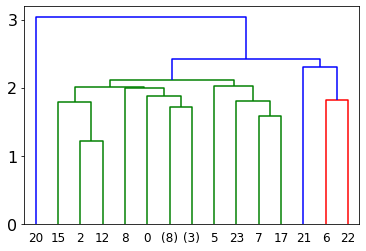

In [93]:
scores=scenarios_regr
hier_clust = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='ward').fit(scores.values)
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

plot_dendrogram(hier_clust, truncate_mode='level', p=6)

In [180]:
n_clust=2
scenarios_regr_trans=scenarios_regr.transpose()
km = TimeSeriesKMeans(n_clusters=n_clust, verbose=True, random_state=42)
profiles = km.fit_predict(scenarios_regr_trans)

for sel in range(0,n_clust):
    prof=scenarios_regr_trans[profiles==sel]
    fig=go.Figure()
    print(f'Profile cardinality [%]: {len(prof)/len(scenarios_regr_trans)}')
    for idx in range(0,len(prof.index)):
        fig.add_trace(go.Scatter(x=scenarios_regr.index+1,y=prof.iloc[idx], name=str(prof.index[idx]),marker=dict(color='LightSkyBlue')))
    fig.add_trace(go.Scatter(x=scenarios_regr.index+1,y=km.cluster_centers_[sel].ravel(), name='Reference profile',marker=dict(color='red')))
    fig.update_layout(title="Scenario acceptance profile",
                      xaxis_title="time [hour]",
                      font=dict(family="Times New Roman, monospace",size=14,color="RebeccaPurple"),
                      template="plotly_white")
    fig.show()



0.420 --> 0.365 --> 0.365 --> 
Profile cardinality [%]: 0.03


Profile cardinality [%]: 0.97


In [94]:


# Euclidean k-means
print("Euclidean k-means")
km = TimeSeriesKMeans(n_clusters=3, verbose=True, random_state=seed)
y_pred = km.fit_predict(X_train)

plt.figure()
for yi in range(3):
    plt.subplot(3, 3, yi + 1)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Euclidean $k$-means")

# DBA-k-means
print("DBA k-means")
dba_km = TimeSeriesKMeans(n_clusters=3,
                          n_init=2,
                          metric="dtw",
                          verbose=True,
                          max_iter_barycenter=10,
                          random_state=seed)
y_pred = dba_km.fit_predict(X_train)

for yi in range(3):
    plt.subplot(3, 3, 4 + yi)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(dba_km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("DBA $k$-means")

# Soft-DTW-k-means
print("Soft-DTW k-means")
sdtw_km = TimeSeriesKMeans(n_clusters=3,
                           metric="softdtw",
                           metric_params={"gamma": .01},
                           verbose=True,
                           random_state=seed)
y_pred = sdtw_km.fit_predict(X_train)

for yi in range(3):
    plt.subplot(3, 3, 7 + yi)
    for xx in X_train[y_pred == yi]:
        plt.plot(xx.ravel(), "k-", alpha=.2)
    plt.plot(sdtw_km.cluster_centers_[yi].ravel(), "r-")
    plt.xlim(0, sz)
    plt.ylim(-4, 4)
    plt.text(0.55, 0.85,'Cluster %d' % (yi + 1),
             transform=plt.gca().transAxes)
    if yi == 1:
        plt.title("Soft-DTW $k$-means")

plt.tight_layout()
plt.show()

C:\Users\Anaconda\lib\site-packages\plotly\graph_objs\_deprecations.py:441: DeprecationWarning:

plotly.graph_objs.Marker is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Marker
  - plotly.graph_objs.histogram.selected.Marker
  - etc.


C:\Users\Anaconda\lib\site-packages\plotly\graph_objs\_deprecations.py:40: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




ValueError: 
    Invalid element(s) received for the 'data' property of 
        Invalid elements include: ['texttemplate', 'uirevision', 'customdata', 'error_y', 'visible', 'orientation', 'dy', 'y', 'connectgaps', 'hovertext']

    The 'data' property is a tuple of trace instances
    that may be specified as:
      - A list or tuple of trace instances
        (e.g. [Scatter(...), Bar(...)])
      - A single trace instance
        (e.g. Scatter(...), Bar(...), etc.)
      - A list or tuple of dicts of string/value properties where:
        - The 'type' property specifies the trace type
            One of: ['area', 'bar', 'barpolar', 'box',
                     'candlestick', 'carpet', 'choropleth',
                     'choroplethmapbox', 'cone', 'contour',
                     'contourcarpet', 'densitymapbox', 'funnel',
                     'funnelarea', 'heatmap', 'heatmapgl',
                     'histogram', 'histogram2d',
                     'histogram2dcontour', 'image', 'indicator',
                     'isosurface', 'mesh3d', 'ohlc', 'parcats',
                     'parcoords', 'pie', 'pointcloud', 'sankey',
                     'scatter', 'scatter3d', 'scattercarpet',
                     'scattergeo', 'scattergl', 'scattermapbox',
                     'scatterpolar', 'scatterpolargl',
                     'scatterternary', 'splom', 'streamtube',
                     'sunburst', 'surface', 'table', 'treemap',
                     'violin', 'volume', 'waterfall']

        - All remaining properties are passed to the constructor of
          the specified trace type

        (e.g. [{'type': 'scatter', ...}, {'type': 'bar, ...}])